In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data = pd.read_csv(r"SMS_train.csv", encoding = "ISO-8859-1")
data.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [3]:
# x = data["Message_body"]
x = data[["Message_body"]]

In [4]:
data["Label"].value_counts()

Label
Non-Spam    835
Spam        122
Name: count, dtype: int64

In [5]:
y = data["Label"]

In [6]:
x.shape

(957, 1)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
x_train.shape

(765, 1)

In [9]:
x_train.ndim

2

In [10]:
y_train.shape

(765,)

In [11]:
y_train.ndim

1

In [12]:
x_test.shape

(192, 1)

In [13]:
y_test.shape

(192,)

In [14]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("vector", TfidfVectorizer(
            stop_words="english",
            ngram_range=(1, 3),
            max_features=10000
        ), "Message_body")
    ],
    remainder="drop"
)

In [15]:
# Pipeline
pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("lr", LogisticRegression(
            class_weight="balanced",
            max_iter=1000,
            random_state=42
        ))
    ]
)

In [16]:
# Train model
pipeline.fit(x_train[["Message_body"]], y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('lr', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('vector', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse 

In [17]:
# Make predictions on test set
y_pred = pipeline.predict(x_test)

In [18]:
y_pred

array(['Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam', 'Spam',
       'Spam', 'No

In [19]:
print("Training Accuracy is: ", pipeline.score(x_train, y_train)*100)
print("Testing Accuracy is: ", pipeline.score(x_test, y_test)*100)

Training Accuracy is:  99.86928104575163
Testing Accuracy is:  97.39583333333334


In [20]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    Non-Spam       0.98      0.99      0.98       165
        Spam       0.96      0.85      0.90        27

    accuracy                           0.97       192
   macro avg       0.97      0.92      0.94       192
weighted avg       0.97      0.97      0.97       192



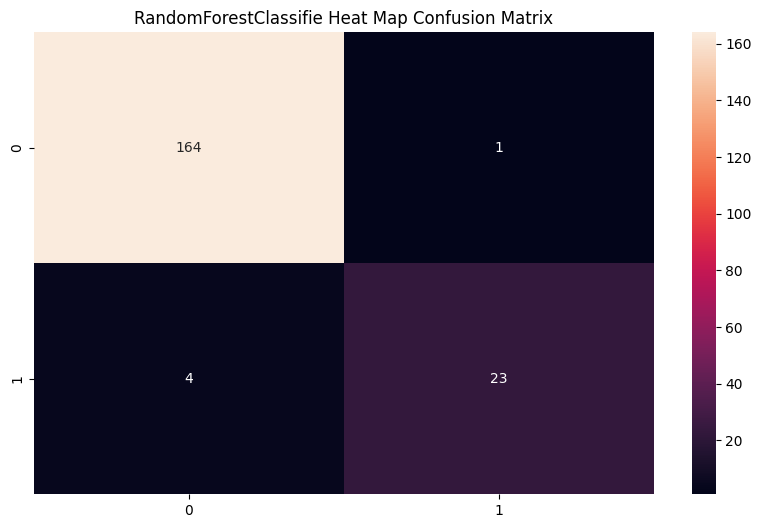

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,6))
sns.heatmap(cm , annot = True, fmt = "d", color = "blue")
plt.title("RandomForestClassifie Heat Map Confusion Matrix")
plt.show()

In [23]:
import joblib
joblib.dump(pipeline, "Email_Spam_Detection.joblib")

['Email_Spam_Detection.joblib']